### Questions
* normalization and standardization
* finding residuals
* statsmodels
* r2 score - 2 equations

### Objectives
YWBAT
* define linear regression
* describe what the various parts do in regards to the linreg equation
* calculate the error of a linear regression equation
* graph residuals and discuss heteroskedacicity

### Outline
* discuss linear regression and it's use cases
* mock up some data
* run ols on it
    * statsmodels
    * score using r2
    * score r2 by hand comparing the 2 equations
* summarize our sm ols summary

### What is linear regression?
fitting a line y_hat = mx + b to some data points (x vs y), such that our line has minimal error in predicting y values.

Linear Regression - takes data (x and y values), plotting them on a graph.  Using y = mx + b to determine the slope and draw a line through the points.  Then determine the error. 

How one variable effects another variable.

![](linregimage.png)

### When do we use it?
When there are two variables that are related

Almost never

### Let's make an example with some data!!!!!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.xkcd()

**Generate x data**

In [8]:
# 50 values between 0 and 100 including 0 and 100
x_vals = np.linspace(0, 100, 51)

In [9]:
x_vals

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100.])

**Generate y data**

In [10]:
# y = mx + b + error, slope = m and bias = b

# choosing a random integer between 20 and 50 for a slope
slope = np.random.randint(20, 50)


# generates normal distribution with mu=100 sigma=200 n_points=50
errors = np.random.normal(300, 500, 51)

# bias ~ intercept
# random integer between 20 and 200
bias = np.random.randint(20, 200)

In [11]:
# y = b + mx + errors
y_vals = bias + slope*x_vals + errors

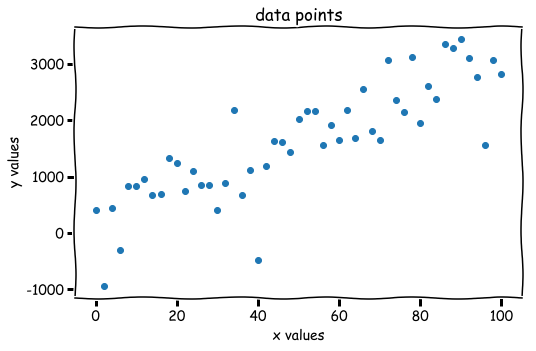

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals)
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.show()

## Compare Guessing to Using Statsmodels

### Let's check the correlation coefficient

In [14]:
np.corrcoef(x_vals, y_vals)

array([[1.        , 0.84805296],
       [0.84805296, 1.        ]])

In [15]:
### let's just guess a slope
slope_guess = 30
bias_guess = 0

In [16]:
### this yields a y_hat array of
y_hat = bias_guess + slope_guess*x_vals
y_hat

array([   0.,   60.,  120.,  180.,  240.,  300.,  360.,  420.,  480.,
        540.,  600.,  660.,  720.,  780.,  840.,  900.,  960., 1020.,
       1080., 1140., 1200., 1260., 1320., 1380., 1440., 1500., 1560.,
       1620., 1680., 1740., 1800., 1860., 1920., 1980., 2040., 2100.,
       2160., 2220., 2280., 2340., 2400., 2460., 2520., 2580., 2640.,
       2700., 2760., 2820., 2880., 2940., 3000.])

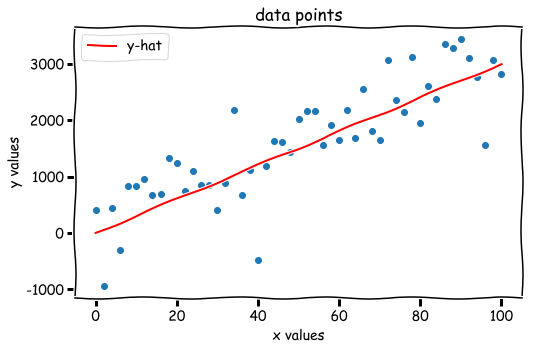

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, y_hat, c='r', label='y-hat')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.legend()
plt.show()

### RMSE equation
![](rmse.png)

In [20]:
### Yikes! How bad is this?

### Let's create our RMSE equations

def RMSE1(y_true, y_pred):
    num = np.sum((y_pred - np.mean(y_true))**2)
    den = np.sum((y_true - np.mean(y_true))**2)
    return num / den

def RMSE2(y_true, y_pred):
    num = np.sum((y_true - y_pred)**2)
    den = np.sum((y_true - y_true.mean())**2)
    return 1 - num / den

In [21]:
RMSE1(y_vals, y_hat)

0.7772369138460854

In [22]:
RMSE2(y_vals, y_hat)

0.7040310035161832

### which one will python use? Let's import from sklearn.metrics

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_vals, y_hat)

0.7040310035161832

### now, how can we do this using statsmodels?

In [27]:
import statsmodels.api as sm # very standard

In [28]:
x_vals

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100.])

In [29]:
x = sm.add_constant(x_vals) 
# adding a constant to estimate a beta_0 value (constant value) for your equation

In [32]:
x[:10]

array([[ 1.,  0.],
       [ 1.,  2.],
       [ 1.,  4.],
       [ 1.,  6.],
       [ 1.,  8.],
       [ 1., 10.],
       [ 1., 12.],
       [ 1., 14.],
       [ 1., 16.],
       [ 1., 18.]])

In [33]:
linreg = sm.OLS(y_vals, x).fit()

In [34]:
summary = linreg.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     125.5
Date:                Thu, 23 May 2019   Prob (F-statistic):           4.06e-15
Time:                        14:42:09   Log-Likelihood:                -392.85
No. Observations:                  51   AIC:                             789.7
Df Residuals:                      49   BIC:                             793.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        165.2947    150.885      1.096      0.279    -137.920     468.509
x1            29.1315      2.600     11.203      0.000      23.906      34.357
==============================================================================
Omnibus:                       13.145   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.891
Skew:                          -0.997   Prob(JB):                     0.000584
Kurtosis:                       4.741   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's interpret this!
* R-squared - 71% so we can explain 71% of the variance
* const: - 165.2947 - y-intercept - pvalue=0.279 this is probably random
* x1: coeff - 29.1315 - slope - pvalue=0.000 this is not random
* skewedness: -0.997 - Skewed to the left by an amount
* kurtosis: 4.741 - data is not centered on the mean 

In [35]:
# plot residuals
residuals = y_hat - y_vals

In [55]:
# plot for heteroskedacicity
def plot_residuals(residuals, ylim=[-1500, 1500]):
    xis = np.linspace(0, 1, len(residuals))
    plt.scatter(xis, residuals)
    plt.hlines(y=0, xmin=0, xmax=1, colors='r')
    plt.ylim(ylim)
    plt.show()
    
    plt.hist(residuals, bins=20)
    plt.show()

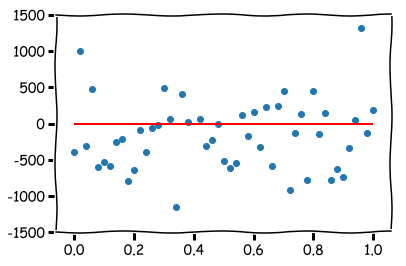

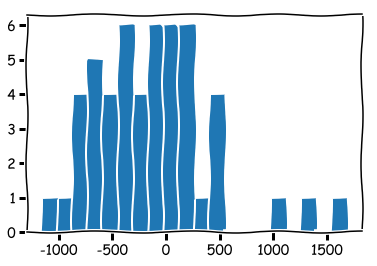

In [57]:
plot_residuals(residuals)

In [44]:
# how close were we?
bias, slope

(36, 28)

In [45]:
linreg.params

array([165.29472623,  29.13154899])

In [46]:
ols_bias, ols_slope = linreg.params
ols_y_hat = ols_bias + ols_slope*x_vals
ols_slope, ols_bias

(29.131548985125946, 165.29472623494996)

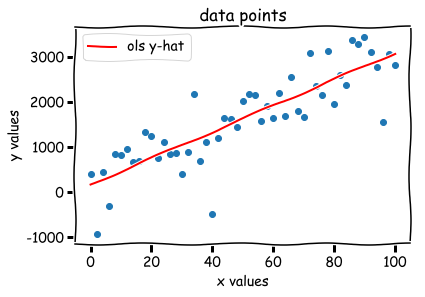

In [48]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, ols_y_hat, c='r', label='ols y-hat')
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.legend()
plt.show()

In [50]:
sm_residuals = linreg.resid

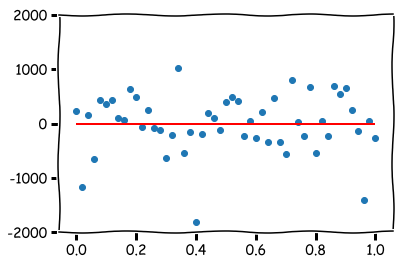

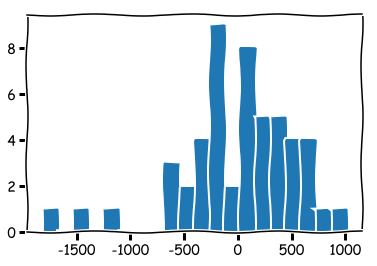

In [59]:
plot_residuals(sm_residuals, ylim=[-2000, 2000])

In [60]:
best_y_hat = bias + slope*x_vals

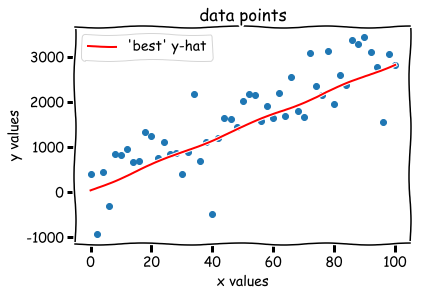

In [61]:
plt.scatter(x_vals, y_vals)
plt.plot(x_vals, best_y_hat, c='r', label="'best' y-hat")
plt.xlabel("x values")
plt.ylabel("y values")
plt.title("data points")
plt.legend()
plt.show()

In [62]:
r2_score(y_vals, ols_y_hat), r2_score(y_vals, best_y_hat)

(0.71919381491224, 0.6843259397513707)

In [64]:
residuals_ols = y_vals - ols_y_hat
residuals_best = y_vals - best_y_hat

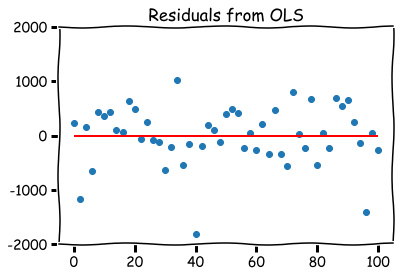

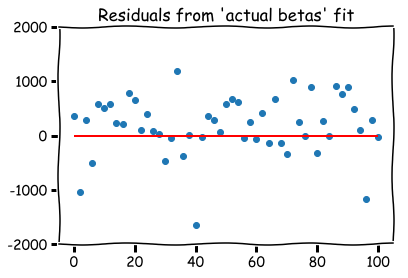

In [66]:
plt.scatter(x_vals, residuals_ols)
plt.title("Residuals from OLS")
plt.hlines(xmin=0, xmax=100, color='r', y=0)
plt.ylim([-2000, 2000])
plt.show()

plt.scatter(x_vals, residuals_best)
plt.title("Residuals from 'actual betas' fit")
plt.hlines(xmin=0, xmax=100, color='r', y=0)
plt.ylim([-2000, 2000])
plt.show()

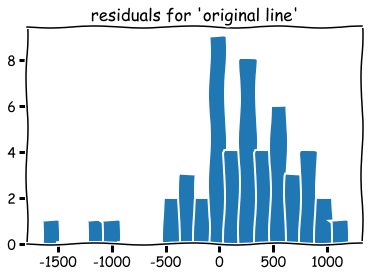

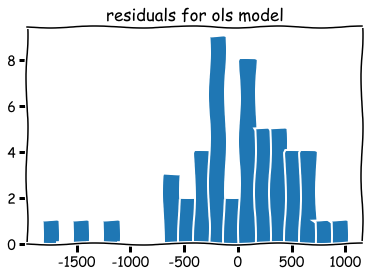

In [67]:
plt.hist(residuals_best, bins=20)
plt.title("residuals for 'original line'")
plt.show()

plt.hist(residuals_ols, bins=20)
plt.title("residuals for ols model")
plt.show()

### what did we learn?